In [2]:
from sklearn.datasets import make_circles

In [3]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [31]:
X.shape

(1000, 2)

In [5]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
import pandas as pd

In [7]:
circles = pd.DataFrame({'X0':X[:,0], 'X1':X[:,1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [8]:
import matplotlib.pyplot as plt

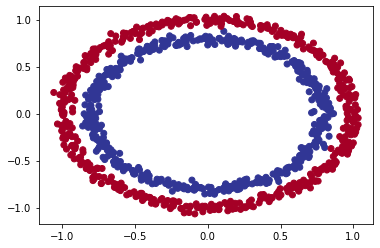

In [9]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [10]:
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
import tensorflow as tf

In [24]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])



In [25]:
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 765us/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/5
32/32 [==============================] - 0s 809us/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/5
32/32 [==============================] - 0s 882us/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/5
32/32 [==============================] - 0s 854us/step - loss: 0.6943 - accuracy: 0.4750


In [26]:
import numpy as np

In [27]:
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification...


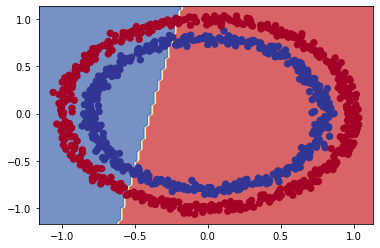

In [28]:
plot_decision_boundary(model_1, X, y)

In [35]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

In [36]:
X_regression = tf.reshape(X_regression, (-1, 1))
y_regression = tf.reshape(y_regression, (-1, 1))

In [37]:
X_regression.shape, y_regression.shape

(TensorShape([200, 1]), TensorShape([200, 1]))

In [38]:
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [39]:
X_reg_train.shape, X_reg_test.shape, y_reg_train.shape, y_reg_test.shape

(TensorShape([150, 1]),
 TensorShape([50, 1]),
 TensorShape([150, 1]),
 TensorShape([50, 1]))

In [41]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [44]:
model_2.fit(X_reg_train, y_reg_train, epochs=5)

Epoch 1/5
5/5 [==============================] - 0s 1ms/step - loss: -7169.6675 - accuracy: 0.0000e+00
Epoch 2/5
5/5 [==============================] - 0s 1ms/step - loss: -7169.6675 - accuracy: 0.0000e+00
Epoch 3/5
5/5 [==============================] - 0s 1ms/step - loss: -7169.6685 - accuracy: 0.0000e+00
Epoch 4/5
5/5 [==============================] - 0s 1ms/step - loss: -7169.6675 - accuracy: 0.0000e+00
Epoch 5/5
5/5 [==============================] - 0s 2ms/step - loss: -7169.6675 - accuracy: 0.0000e+00


In [46]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

In [50]:
model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=2)

Epoch 1/100
5/5 - 0s - loss: 26.8765 - mae: 26.8765
Epoch 2/100
5/5 - 0s - loss: 25.4249 - mae: 25.4249
Epoch 3/100
5/5 - 0s - loss: 25.8836 - mae: 25.8836
Epoch 4/100
5/5 - 0s - loss: 26.1398 - mae: 26.1398
Epoch 5/100
5/5 - 0s - loss: 25.7764 - mae: 25.7764
Epoch 6/100
5/5 - 0s - loss: 25.0305 - mae: 25.0305
Epoch 7/100
5/5 - 0s - loss: 24.7077 - mae: 24.7077
Epoch 8/100
5/5 - 0s - loss: 25.8648 - mae: 25.8648
Epoch 9/100
5/5 - 0s - loss: 26.1982 - mae: 26.1982
Epoch 10/100
5/5 - 0s - loss: 27.2258 - mae: 27.2258
Epoch 11/100
5/5 - 0s - loss: 23.5533 - mae: 23.5533
Epoch 12/100
5/5 - 0s - loss: 23.5800 - mae: 23.5800
Epoch 13/100
5/5 - 0s - loss: 24.7389 - mae: 24.7389
Epoch 14/100
5/5 - 0s - loss: 23.4666 - mae: 23.4666
Epoch 15/100
5/5 - 0s - loss: 22.2383 - mae: 22.2383
Epoch 16/100
5/5 - 0s - loss: 22.5965 - mae: 22.5965
Epoch 17/100
5/5 - 0s - loss: 21.9949 - mae: 21.9949
Epoch 18/100
5/5 - 0s - loss: 20.9851 - mae: 20.9851
Epoch 19/100
5/5 - 0s - loss: 20.7743 - mae: 20.7743
Ep

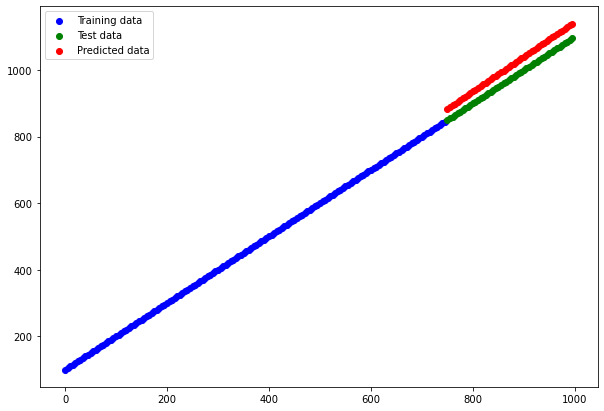

In [56]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predicted data')
plt.legend();

In [61]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear')
])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy'])

In [62]:
model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 562us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 638us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 649us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 606us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 694us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 620us/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 642us/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 704us/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 692us/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 760us/step - loss: 3.7419 - accura

In [63]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu')
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy'])

In [64]:
model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 564us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 635us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 707us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 653us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 769us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 828us/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 766us/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 713us/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 729us/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7419 - accuracy

In [66]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu')
])

model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy'])

model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 636us/step - loss: 3.2091 - accuracy: 0.0010
Epoch 2/100
32/32 [==============================] - 0s 743us/step - loss: 2.6774 - accuracy: 0.0050
Epoch 3/100
32/32 [==============================] - 0s 760us/step - loss: 2.5260 - accuracy: 0.0100
Epoch 4/100
32/32 [==============================] - 0s 756us/step - loss: 2.4545 - accuracy: 0.0220
Epoch 5/100
32/32 [==============================] - 0s 767us/step - loss: 2.3271 - accuracy: 0.0420
Epoch 6/100
32/32 [==============================] - 0s 730us/step - loss: 1.9320 - accuracy: 0.0790
Epoch 7/100
32/32 [==============================] - 0s 765us/step - loss: 1.6530 - accuracy: 0.1220
Epoch 8/100
32/32 [==============================] - 0s 762us/step - loss: 1.5982 - accuracy: 0.1320
Epoch 9/100
32/32 [==============================] - 0s 877us/step - loss: 1.5331 - accuracy: 0.1440
Epoch 10/100
32/32 [==============================] - 0s 757us/step - loss: 1.4113 - accura